<a href="https://colab.research.google.com/github/ydicsey/image-processing/blob/main/dither_iterative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## https://blog.csdn.net/vily_lei/article/details/86698766

In [ ]:
#import the library
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
!git clone https://github.com/ydicsey/image-processing.git

fatal: destination path 'image-processing' already exists and is not an empty directory.


In [ ]:
img_path = '/content/image-processing/input.jpg'
img = cv.imread(img_path)
img.shape

(885, 1180, 3)

In [ ]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray

array([[219, 219, 218, ..., 183, 183, 183],
       [219, 219, 218, ..., 183, 183, 183],
       [219, 218, 218, ..., 183, 183, 183],
       ...,
       [120, 120, 120, ..., 172, 173, 174],
       [120, 120, 120, ..., 172, 171, 170],
       [120, 120, 120, ..., 171, 171, 171]], dtype=uint8)

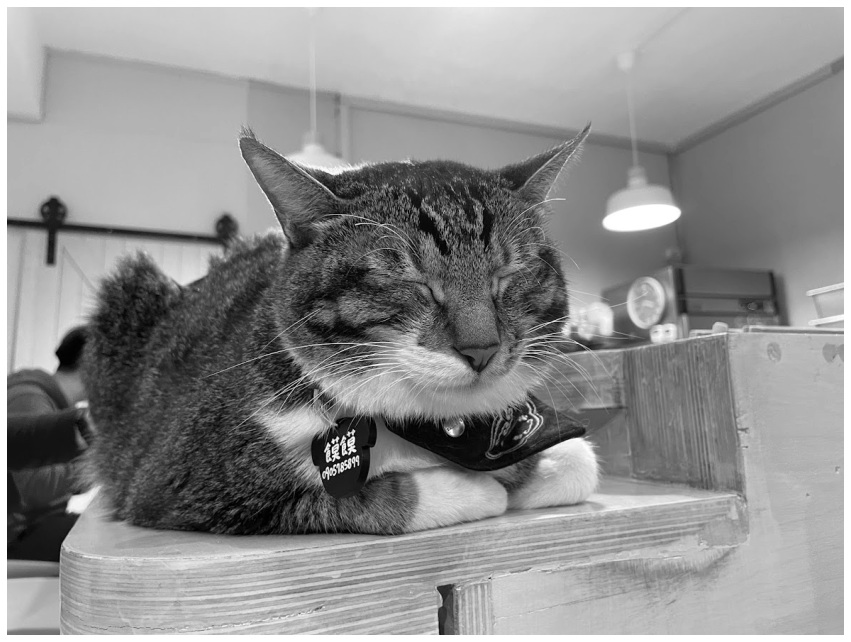

In [ ]:
plt.axis('off')
plt.imshow(gray, cmap="gray")
plt.show()

define a 4*4 Bayer Matrix

In [ ]:
d2 = np.array([ [  0, 128,  32, 160,],  
                [192,  64, 224,  95,], 
                [ 48, 176,  16, 144,],  
                [240, 112, 208,  80 ] ])

In [ ]:
x, y = gray.shape

In [ ]:
out = np.zeros([x, y], dtype='uint8')

* n % length = n & (length-1)
* only for length = 2^n

In [ ]:
for i in range(x):
    for j in range(y):
        if gray[i,j] > d2[i&3][j&3]:
            out[i, j] = 255
        else:
            out[i, j] = 0
out

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255,   0, ..., 255,   0, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255,   0, 255, ...,   0, 255, 255],
       [  0, 255,   0, ..., 255,   0, 255],
       [255,   0, 255, ..., 255, 255, 255]], dtype=uint8)

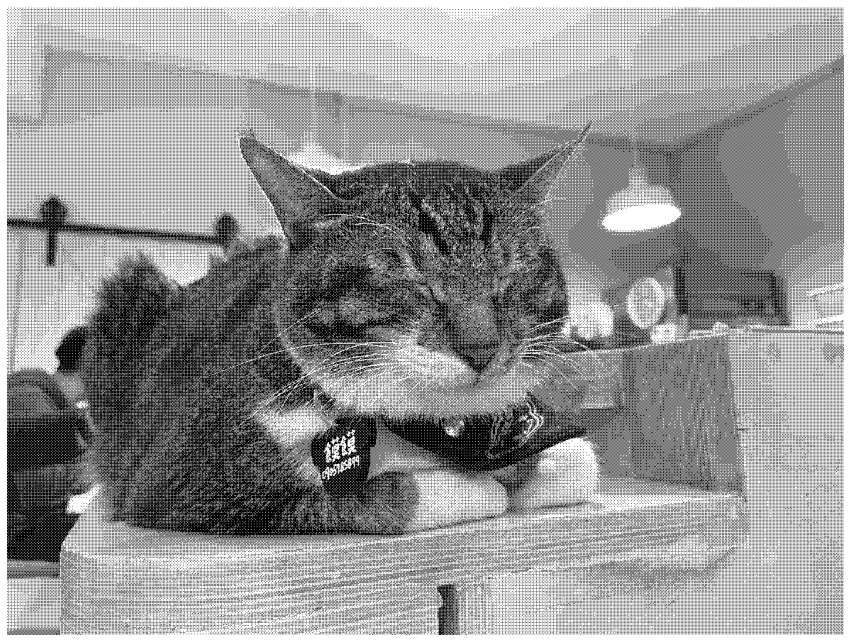

In [ ]:
plt.rcParams["figure.figsize"] = (15, 15)
plt.axis('off')
plt.imshow(out, cmap="gray")
plt.show()

In [ ]:
d1 = np.array([ [ 0, 56], 
                [84, 28] ])

In [ ]:
out2 = np.zeros([x, y], dtype='uint8')

In [ ]:
for i in range(x):
    for j in range(y):
        Qij = gray[i,j] // 85
        if (gray[i,j] - 85*Qij) > d1[i&1][j&1]:
            out2[i, j] = (1 + Qij)*85
        else:
            out2[i, j] = Qij*85
out2

array([[255, 170, 255, ..., 170, 255, 170],
       [170, 255, 170, ..., 170, 170, 170],
       [255, 170, 255, ..., 170, 255, 170],
       ...,
       [170,  85, 170, ..., 170, 255, 170],
       [ 85, 170,  85, ..., 170, 170, 170],
       [170,  85, 170, ..., 170, 255, 170]], dtype=uint8)

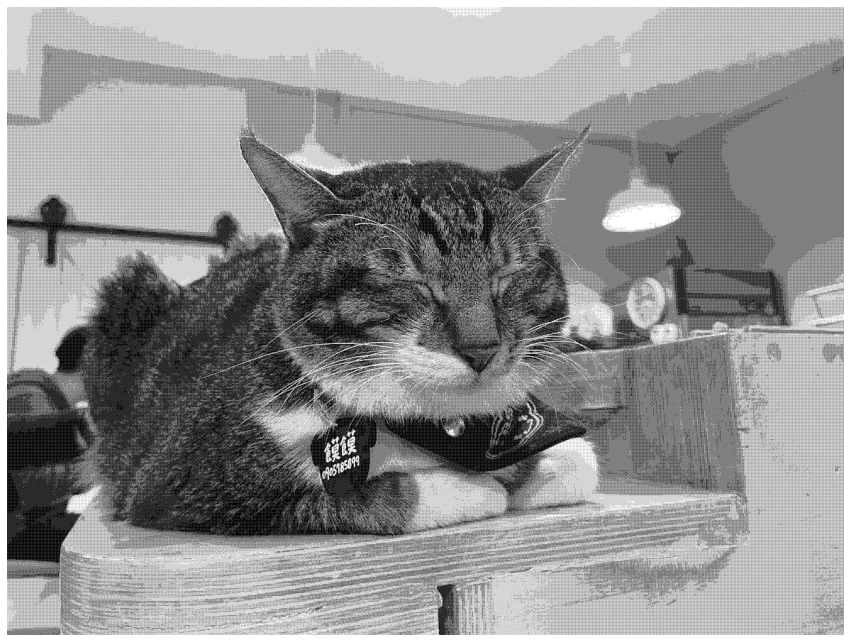

In [ ]:
plt.axis('off')
plt.imshow(out2, cmap="gray")
plt.show()

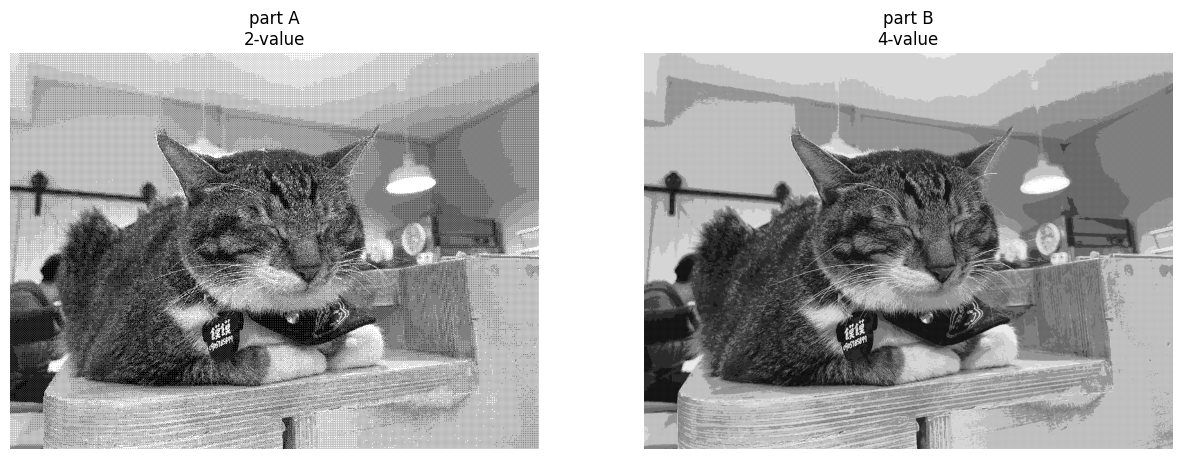

In [ ]:
f = plt.figure(num=None, figsize=(15, 12), dpi=100)

ax2 = f.add_subplot(1,2, 1)
plt.axis('off')
plt.imshow(out, cmap="gray")
ax2.title.set_text('part A\n2-value')

ax2 = f.add_subplot(1,2, 2)
plt.axis('off')
plt.imshow(out2, cmap="gray")
ax2.title.set_text('part B\n4-value')

plt.show()

In [ ]:
path = "partA.jpg"
cv.imwrite(path, out)

True

In [ ]:
path = "partB.jpg"
cv.imwrite(path, out2)

True